Tue 30 JUL 2024

https://www.pexels.com/

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests

In [ ]:
url = 'https://cmu.to/Happy'
response = requests.get(url)
if response.status_code != 200:
    print('Error: Image not found.')
    sys.exit(1)

In [ ]:
img_bgr = cv2.imdecode(np.frombuffer(response.content, dtype=np.uint8), cv2.IMREAD_COLOR)
if img_bgr is None:
    print('Error: Image not decoded.')
    sys.exit(2)

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

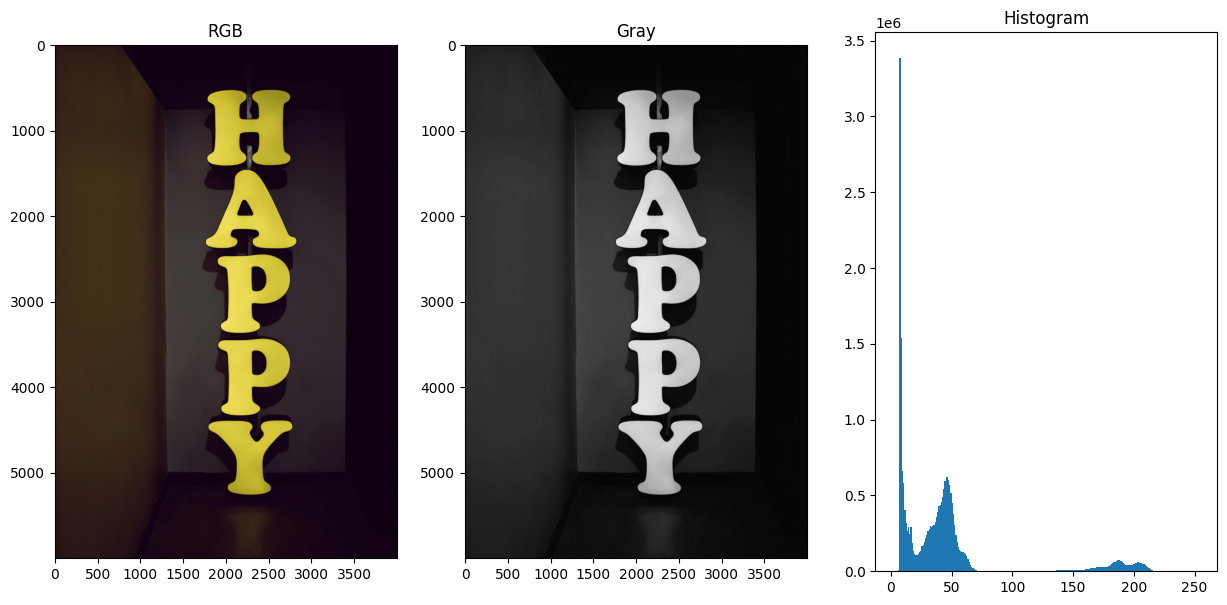

In [ ]:
fig = plt.figure(figsize=(15, 7)) # (W, H) in inches
rows = 1; cols = 3; index = 1

plt.subplot(rows, cols, index); index += 1;
plt.imshow(img_rgb, cmap=None)
plt.title('RGB')

plt.subplot(rows, cols, index); index += 1;
plt.imshow(img_gray, cmap='gray')
plt.title('Gray')

img_flat = img_gray[:,:].flatten() # Convert 2D array to 1D array.
hist, bins = np.histogram(img_flat, bins=256, range=(0, 256))
plt.subplot(rows, cols, index); index += 1;
plt.hist(bins[:-1], bins, weights=hist)
plt.title('Histogram')

plt.show()

fig.savefig('/content/drive/MyDrive/Image Processing/Images/fig_3_images.png')

ตั้งแต่ประมาณ 80-140 ไม่มี Pixel เลย (ลองตัด Threshold ช่วงนี้ดู)

# Binary Image (Binarize the gray scale image)

In [ ]:
retval, img_bin = cv2.threshold(img_gray, thresh=100, maxval=255, type=cv2.THRESH_OTSU) # Try cv2.THRESH_OTSU and cv2.THRESH_BINARY
# THRESH_OTSU จะหาค่าตัด Threshold ที่ดีที่สุดให้เราเอง
print(f'Thrshold value = {retval}')

Thrshold value = 107.0


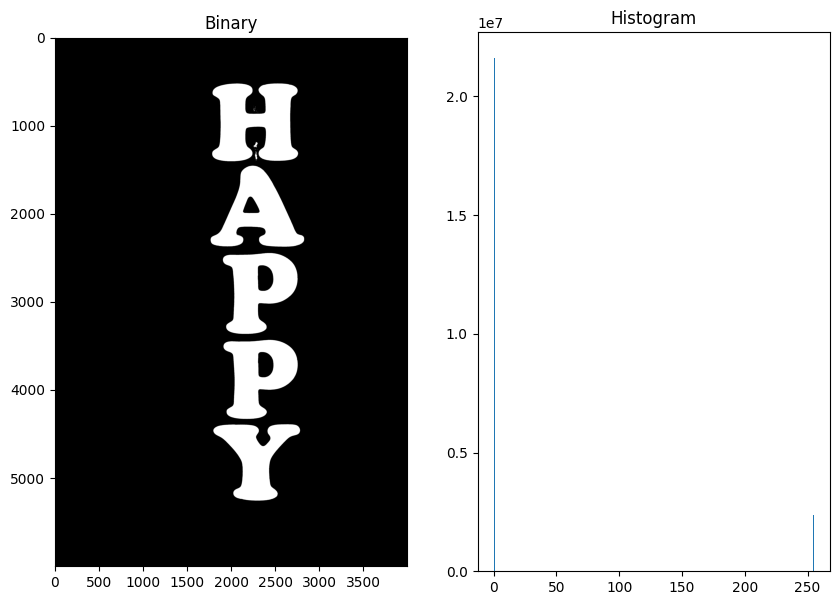

In [ ]:
fig = plt.figure(figsize=(10, 7)) # (W, H) in inches
rows = 1; cols = 2; index = 1

plt.subplot(rows, cols, index); index += 1;
plt.imshow(img_bin, cmap='gray')
plt.title('Binary')


img_flat_bin = img_bin[:,:].flatten() # Convert 2D array to 1D array.
hist, bins = np.histogram(img_flat_bin, bins=256, range=(0, 255))
plt.subplot(rows, cols, index); index += 1;
plt.hist(bins[:-1], bins, weights=hist)
plt.title('Histogram')

plt.show()

#fig.savefig('/content/drive/MyDrive/Image Processing/Images/fig_4_images.png')

ตอนนี้เรามีแค่สองบาร์เส้น 0 คือ สีดำ และ 255 คือ สีขาว

# Distance Transform

ทำการ Normalization ช่วงขอบเส้น

In [ ]:
dist = cv2.distanceTransform(img_bin, distanceType=cv2.DIST_L2, maskSize=3) # Use EuclideanDistrance with cv2.DIST_L2

# Normalize the distance imgae for display.
dist_norm = cv2.normalize(src=dist, dst=None, alpha=0, beta=1.0, norm_type=cv2.NORM_MINMAX)

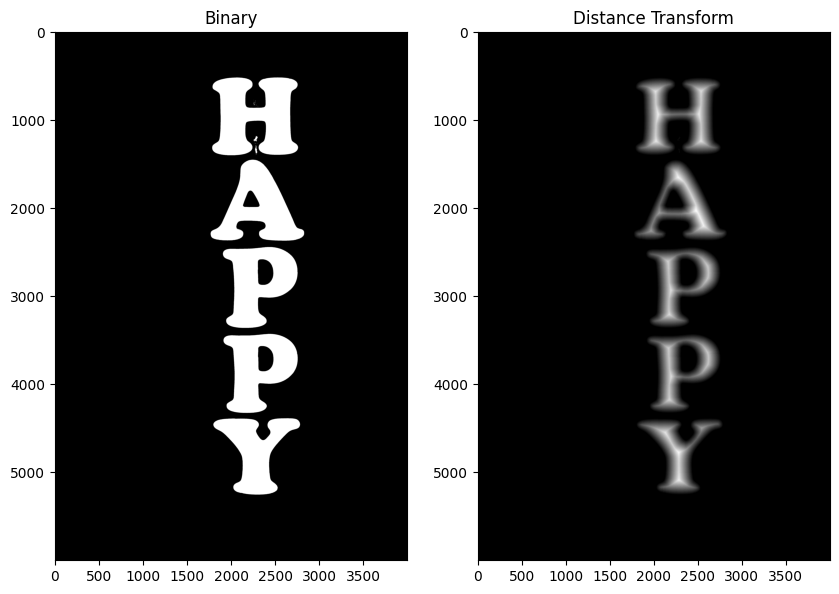

In [ ]:
fig = plt.figure(figsize=(10, 7)) # (W, H) in inches
rows = 1; cols = 2; index = 1

plt.subplot(rows, cols, index); index += 1;
plt.imshow(img_bin, cmap='gray')
plt.title('Binary')

plt.subplot(rows, cols, index); index += 1;
plt.imshow(dist_norm, cmap='gray')
plt.title('Distance Transform')

plt.show()

# ทำการใช้รูปถ่ายของเฟร้นเอง (Homework 11)

In [ ]:
French = cv2.imread('/content/drive/MyDrive/Image Processing/Images/650510714.jpg')

In [ ]:
French_rgb = cv2.cvtColor(French, cv2.COLOR_BGR2RGB)
French_gray = cv2.cvtColor(French, cv2.COLOR_BGR2GRAY)

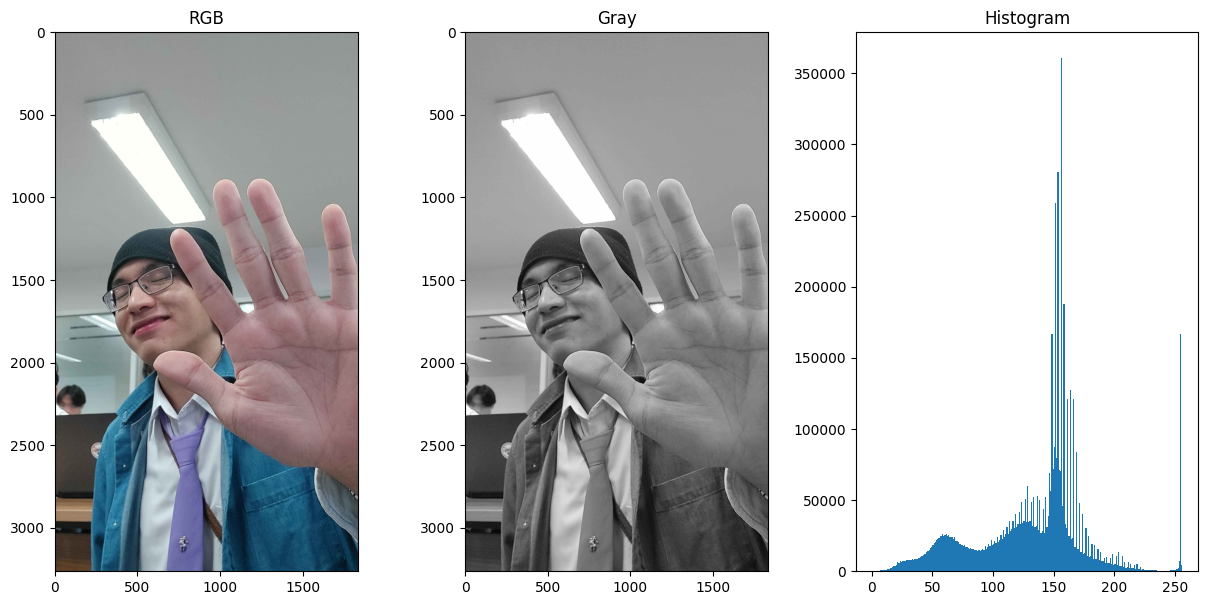

In [ ]:
fig = plt.figure(figsize=(15, 7)) # (W, H) in inches
rows = 1; cols = 3; index = 1

plt.subplot(rows, cols, index); index += 1;
plt.imshow(French_rgb, cmap=None)
plt.title('RGB')

plt.subplot(rows, cols, index); index += 1;
plt.imshow(French_gray, cmap='gray')
plt.title('Gray')

French_flat = French_gray[:,:].flatten() # Convert 2D array to 1D array.
hist, bins = np.histogram(French_flat, bins=256, range=(0, 256))
plt.subplot(rows, cols, index); index += 1;
plt.hist(bins[:-1], bins, weights=hist)
plt.title('Histogram')

plt.show()

fig.savefig('/content/drive/MyDrive/Image Processing/Images/650510714.png')